In [3]:
from google.colab import files
uploaded = files.upload()

Saving Bank_loan.csv to Bank_loan.csv


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [5]:
data=pd.read_csv('Bank_loan.csv')

In [6]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Bank is keen on changing over its risk clients to resource clients by offering them individual loans. A campaign which ran earlier year indicated a conversion rate of 9%. This year they are keen on expanding the transformation rate by focusing on high likelihood customers. This is a model to foresee those clients that are almost certain to acknowledge the personal loan offer.

IMPORTING LIBRARIES

In [7]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import zscore

LOADING THE DATA

In [9]:
data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [10]:
data.head(2)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [11]:
data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


OBSERVATION FROM THE SUMMARY

The Minimum experience is showing negative value of -3, which is negative, so the column should be cleaned 

DATA DISTRIBUTION CHART

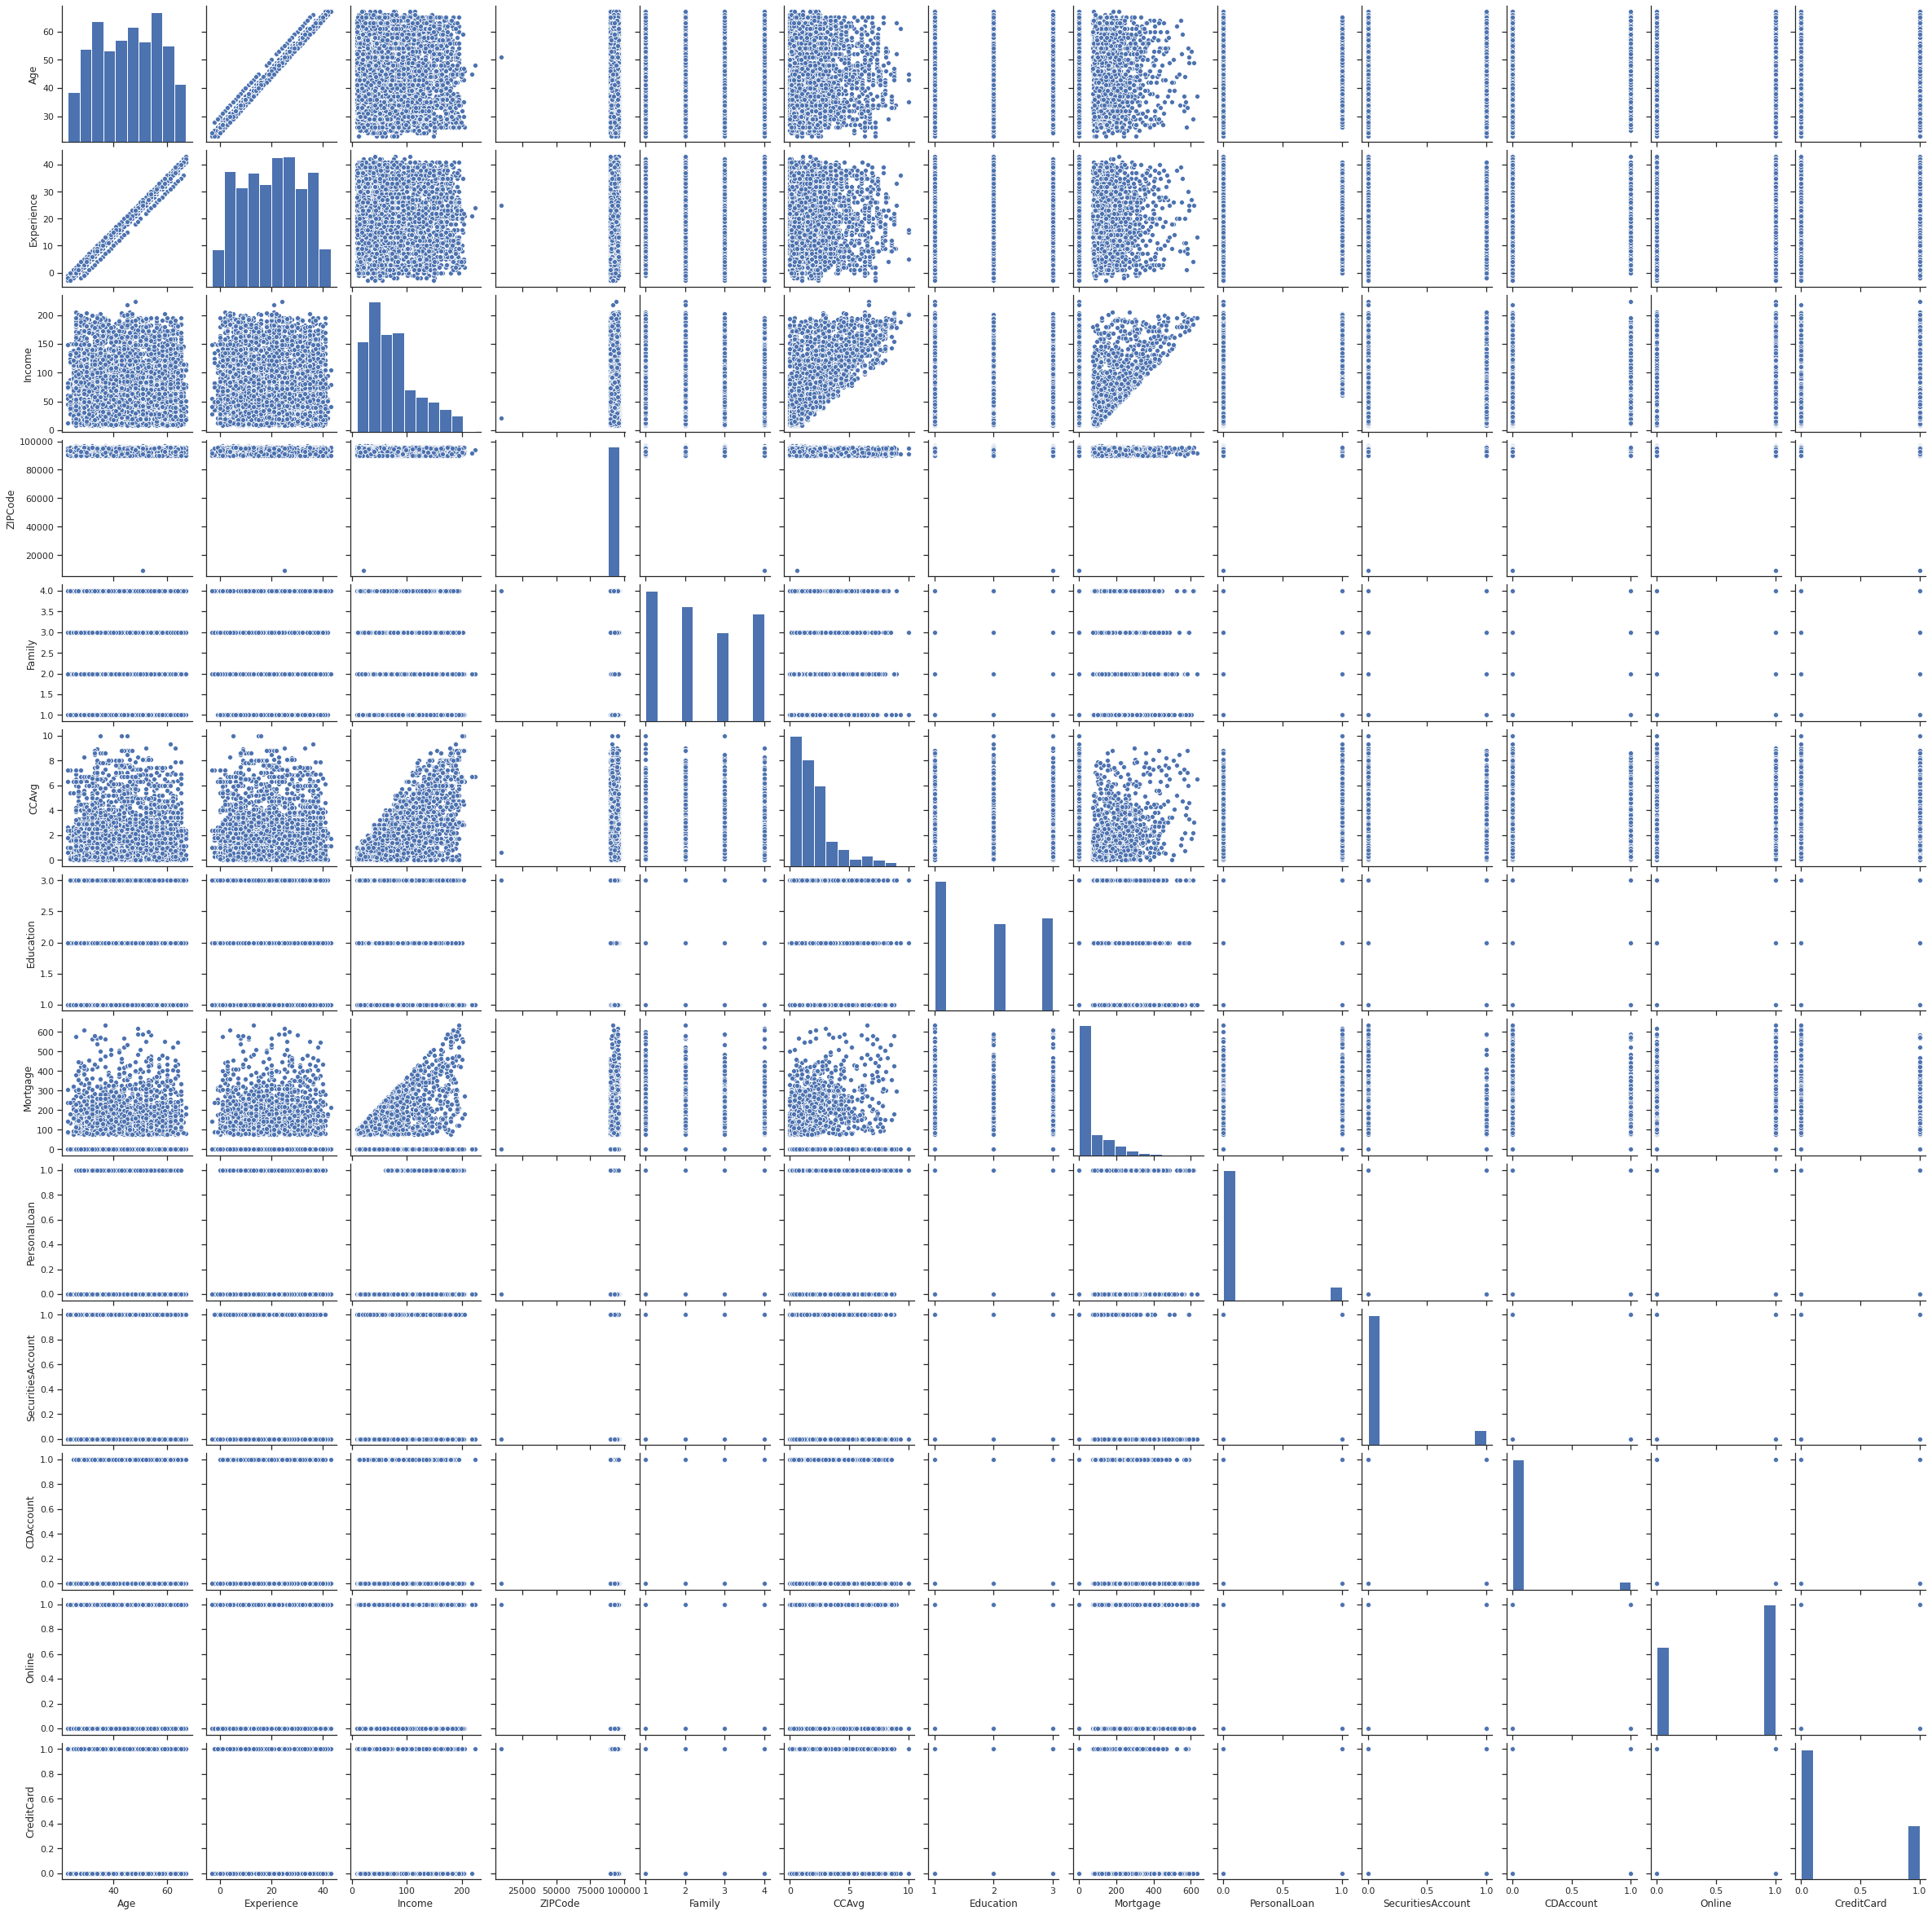

In [13]:
plt = sns.pairplot(data[['Age','Experience','Income','ZIPCode','Family','CCAvg' ,'Education' , 'Mortgage','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']] )

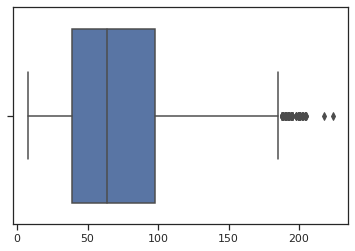

In [14]:
plt = sns.boxplot(data[['Income']])#,'Experience','Income','ZIP Code','Family','CCAvg' ,'Education' , 'Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']] )

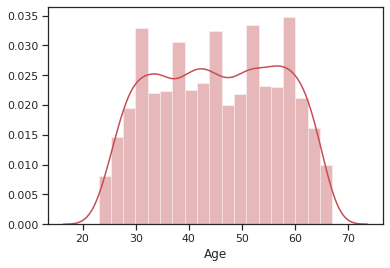

In [21]:
sns.distplot( data['Age'], color = 'r')

OBSERVATION FROM THE DATA
Most of the customers age fall in the age range of 30 to 60 yrs and their experience falls in the range of 5 to 35 years and most customers earn an income between 10K to 100K.

CLEANING THE EXPERIENCE VALUE WHICH IS NEGATIVE

In [22]:
dataposExp = data.loc[data['Experience'] >0]
mask = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[mask]['ID'].tolist()

In [23]:
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    data_filtered = dataposExp[(dataposExp.Age == age) & (dataposExp.Education == education)]
    exp = data_filtered['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

In [24]:
data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,4971.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.243211,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.359189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Influence of Income level on whether a customer takes a personal loan across different education levels.

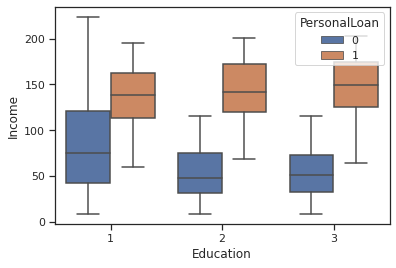

In [25]:
sns.boxplot(x="Education", y="Income", hue="PersonalLoan", data=data)

The above box plot diagram shows that those with Education level 1 have higher incomes. But customers who go for personal loans have the same income distribution regardless of the Education level.

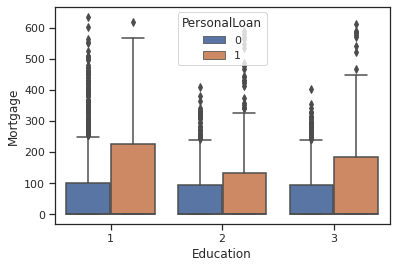

In [26]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=data)

Observation:
Customers who have taken loan also have higher mortgages.

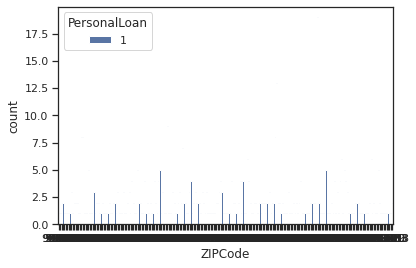

In [27]:
sns.countplot(x="ZIPCode", data=data[data.PersonalLoan==1], hue ="PersonalLoan",orient ='v')

In [28]:
zipcode_top5 = data[data.PersonalLoan==1]['ZIPCode'].value_counts().head(5)
zipcode_top5

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIPCode, dtype: int64

Observation:
Through the Zip code, top 5 locations who applied for personal loan before.

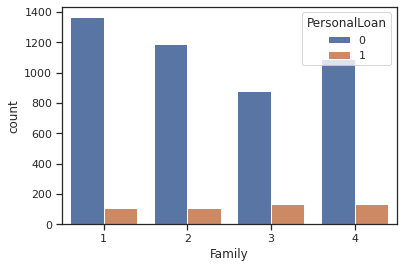

In [30]:
sns.countplot(x="Family", data=data,hue="PersonalLoan")

Observations

Does family size have any influence on whether a customer accepts a personal loan offer?

In [31]:
familysize_no = np.mean( data[data.PersonalLoan == 0]['Family'] )
familysize_no

2.3734513274336284

In [32]:
familysize_yes = np.mean( data[data.PersonalLoan == 1]['Family'] )
familysize_yes

2.6125

In [33]:
from scipy import stats
stats.ttest_ind(data[data.PersonalLoan == 1]['Family'], data[data.PersonalLoan == 1]['Family'])

Ttest_indResult(statistic=0.0, pvalue=1.0)

Observation:

Family size does not impact the decision to take a loan.

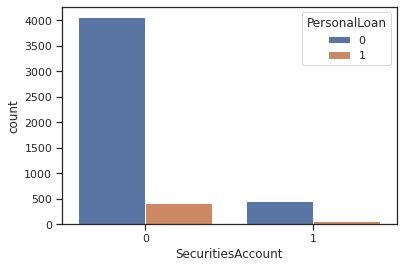

In [35]:
sns.countplot(x="SecuritiesAccount", data=data,hue="PersonalLoan")

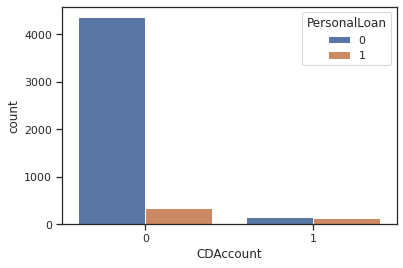

In [36]:
sns.countplot(x="CDAccount", data=data,hue="PersonalLoan")

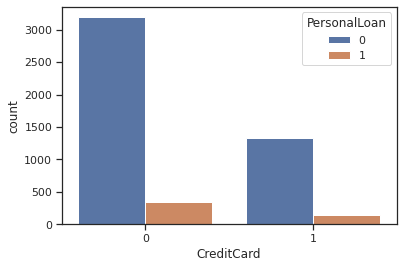

In [37]:
sns.countplot(x="CreditCard", data=data,hue="PersonalLoan")

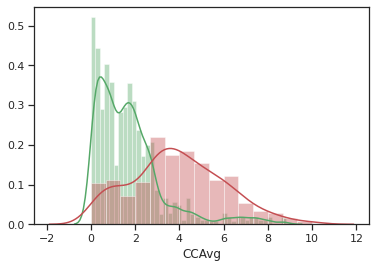

In [38]:
sns.distplot( data[data.PersonalLoan == 0]['CCAvg'], color = 'g')
sns.distplot( data[data.PersonalLoan == 1]['CCAvg'], color = 'r')

Observations:

Customers who have taken personal loan have higher credit card average than those who did not take. So high credit card average seems to be good predictor of whether or not a customer will take a personal loan from the bank.

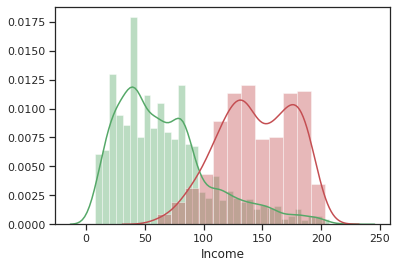

In [39]:
sns.distplot( data[data.PersonalLoan == 0]['Income'], color = 'g')
sns.distplot( data[data.PersonalLoan == 1]['Income'], color = 'r')

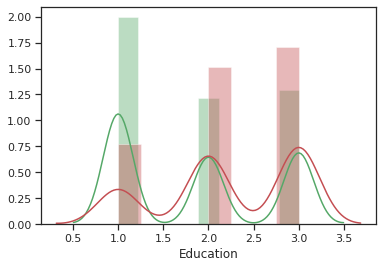

In [40]:
sns.distplot( data[data.PersonalLoan == 0]['Education'], color = 'g')
sns.distplot( data[data.PersonalLoan == 1]['Education'], color = 'r')

CORRELATION AND HEAT MAP COMPARISON

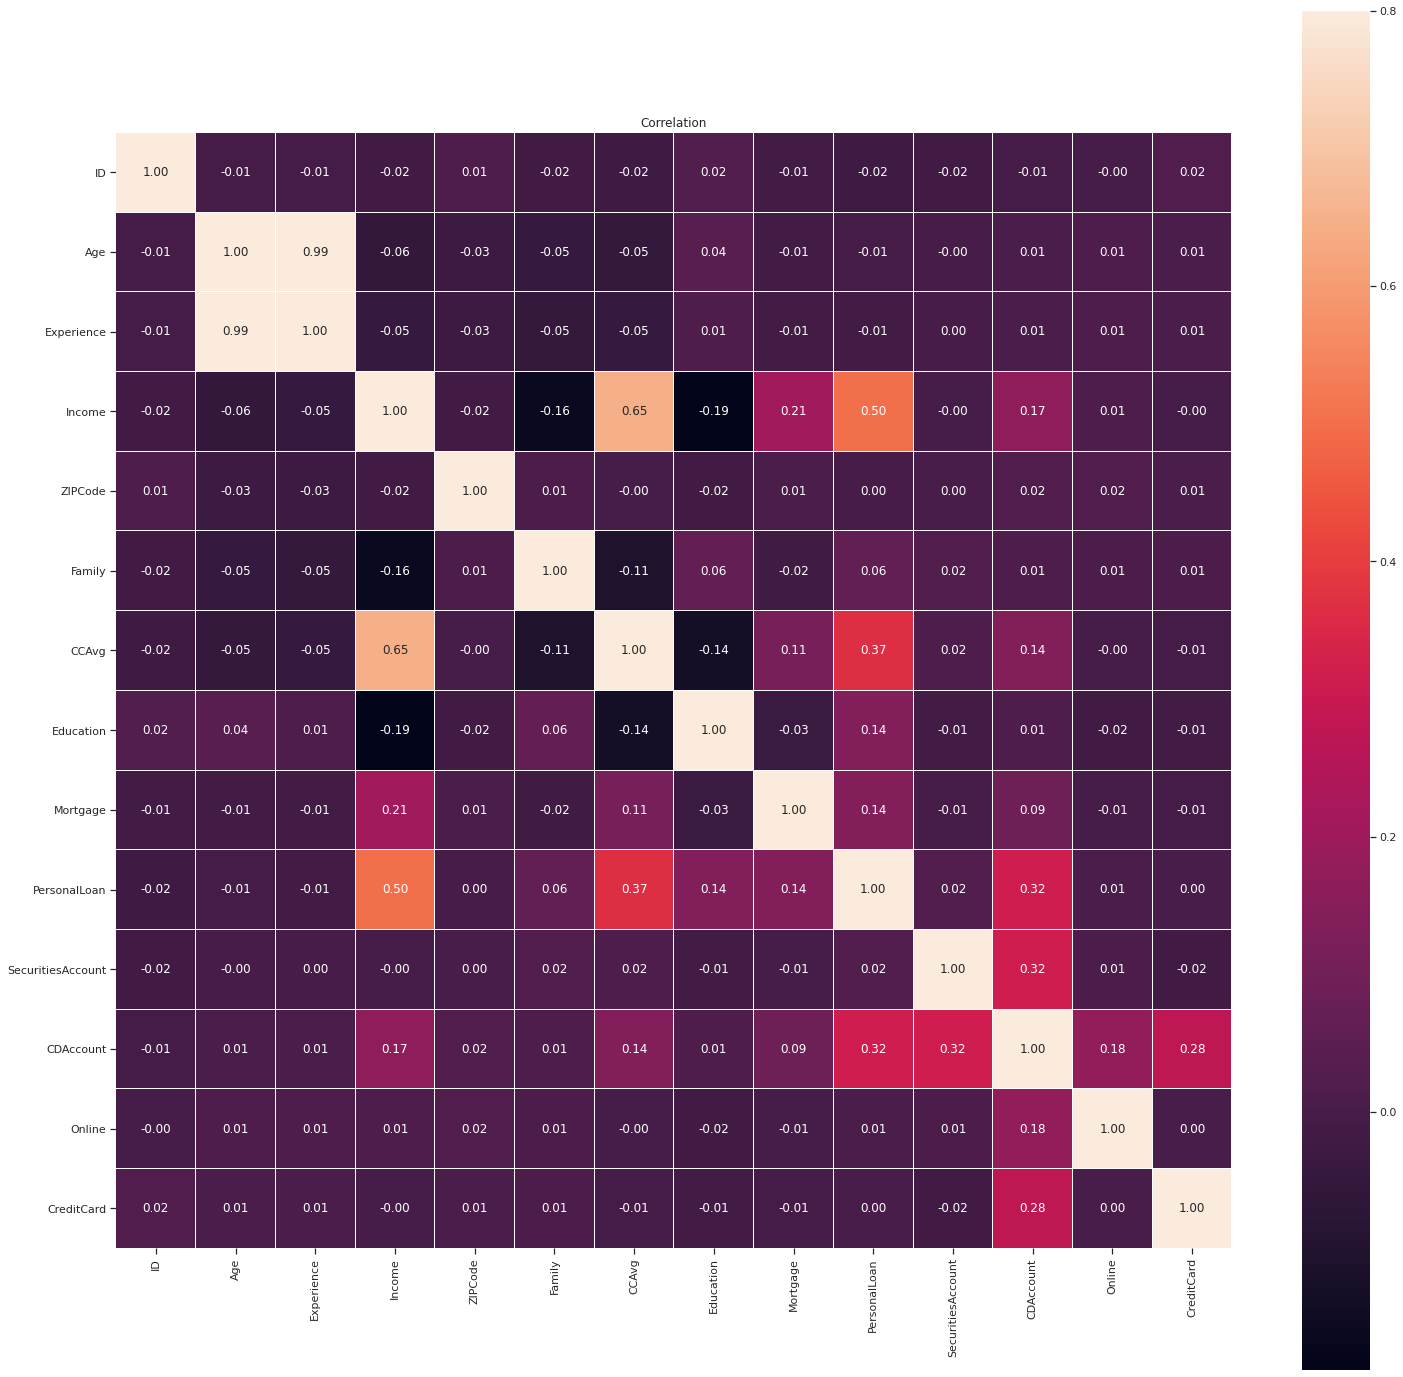

In [41]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 25))
ax = sns.heatmap(data.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

Observation:
Age and Experience is highly and positively correlated.
Income and CCAvg is also correlated.

SPLITTING THE DATA TO TRAIN AND TEST IN 70:30 RATIO

In [45]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data.drop(['Experience' ,'ID' ,'CCAvg'], axis=1), test_size=0.3 , random_state=5)

In [46]:
train_set.describe()

,Age,Income,ZIPCode,Family,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.271143,73.504857,93161.097714,2.395714,1.875714,55.758286,0.094571,0.104857,0.061429,0.600857,0.297143
std,11.464493,46.064243,2254.291294,1.148447,0.835914,100.605397,0.292664,0.306413,0.240149,0.489792,0.457065
min,23.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,92007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,63.000000,93460.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,98.000000,94608.000000,3.000000,3.000000,100.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
test_set.describe()

,Age,Income,ZIPCode,Family,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,45.495333,74.402667,93132.448667,2.398000,1.893333,58.226667,0.099333,0.103333,0.058000,0.587333,0.286667
std,11.462354,45.971659,1775.340532,1.146213,0.849178,104.267850,0.299209,0.304495,0.233821,0.492478,0.452355
min,23.000000,8.000000,90005.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,91768.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,64.000000,93407.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,99.000000,94609.000000,3.000000,3.000000,103.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,218.000000,96651.000000,4.000000,3.000000,590.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
train_labels = train_set.pop("PersonalLoan")
test_labels = test_set.pop("PersonalLoan")

DECISION TREE CLASSIFIER

In [49]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 3)

In [50]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
dt_model.score(test_set , test_labels)

0.974

NAIVE BAYES CLASSIFICATION

In [52]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.8926666666666667

CONFUSION MATRIX

Confusion matrix: Confusion matrix is a table which describes the performance of a prediction model. A confusion matrix contains the actual values and predicted values. we can use these values to calculate the accuracy score of the model.

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(test_labels, prediction).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1275,85
Yes,76,64


RANDOM FOREST CLASSIFIER

In [57]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

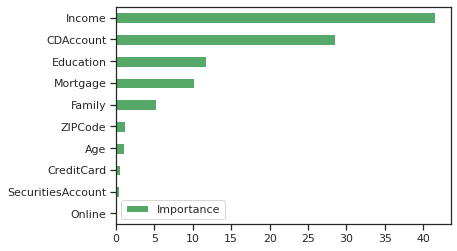

In [58]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train_set.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='g',) 

In [59]:
predicted_random=randomforest_model.predict(test_set)

In [60]:
randomforest_model.score(test_set,test_labels)

0.9146666666666666

K- NEIGHBOURS CLASSIFIER

In [61]:
train_set_indep = data.drop(['Experience' ,'ID' ,'CCAvg'] , axis = 1).drop(labels= "PersonalLoan" , axis = 1)
train_set_indep_z = train_set_indep.apply(zscore)
train_set_dep = data["PersonalLoan"]
X = np.array(train_set_indep_z)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [62]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)

In [63]:
print(acc)

0.9446297531687792


LOGISTIC REGRESSION 

In [65]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_Train,Y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
#predictions
predictions = logmodel.predict(X_Test)

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
print(classification_report(Y_Test, predictions))
print(confusion_matrix(Y_Test, predictions))
print(accuracy_score(Y_Test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1373
           1       0.78      0.61      0.68       126

    accuracy                           0.95      1499
   macro avg       0.87      0.80      0.83      1499
weighted avg       0.95      0.95      0.95      1499

[[1351   22]
 [  49   77]]
0.95263509006004


Classification Result: 
The classification report displays the Precision, Recall , F1-scores and Support scores for the model. 
Precision score means the the level up-to which the prediction made by the model is precise. 
The precision for not purchasing the loan is 0.96 and for purchasing loan is 0.78. Recall is the amount up-to which the model can predict the outcome. 
Recall for not purchasing the loan is 0.98 and for purchasing loan is 0.88. F1 score is the amount of data tested for the predictions which is 0.97 for not Purchasing loan and 0.68 for Purchasing the loan.

From the above observations of various classification techniques, the Decision tree method is a best classifier with 97.4 % classification result.